# Metric #1: Number of Police Incidents Per NeighborHood

**Analyzed by Valerie Schaible**

In [8]:
import geopandas as gpd
import pandas as pd

# Load in the police incidents
police_incidents= gpd.read_file('Police_Incidents.csv')

police_incidents.head(3)

,PK,CCR,HIERARCHY,INCIDENTTIME,INCIDENTLOCATION,CLEAREDFLAG,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTHIERARCHYDESC,OFFENSES,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,geometry
0,2802309,16000001,10,2016-01-01T00:00:00,"400 Block North Shore DR Pittsburgh, PA 15212",Y,North Shore,1,HARRASSMENT/THREAT/ATTEMPT/PHY,2702 Aggravated Assault. / 2709(a) Harassment....,2205,1,6,-80.01233658,40.44626305,None
1,2803174,16004547,11,2016-01-01T00:01:00,"5400 Block Carnegie ST Pittsburgh, PA 15201",N,Upper Lawrenceville,2,THEFT BY DECEPTION,3922 Theft by Deception.,1011,7,2,-79.950295,40.48228989,None
2,2801809,16000367,4,2016-01-01T00:10:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",N,Northview Heights,1,DISCHARGE OF FIREARM INTO OCC.STRUCTURE,2707.1 Discharge of a Firearm into Occupied St...,2609,1,1,-80.00096629,40.47865057,None


This dataset shows all police incidents in Pittsburgh neighborhoods in the last 30 days, as well as categorizing them based on a hierarchy of threat/danger associated with the incident. We can now analyze this dataset to see which neighborhood has the most incidents, and which neighborhood has the most incidents that are highest in the heirarchy.

In [18]:
incidents = pd.DataFrame(columns = ["Neighborhood", "Number of Incidents"])
incidents["Neighborhood"] = police_incidents["INCIDENTNEIGHBORHOOD"]
incidents["Number of Incidents"] = 0

incidents.head(3)

,Neighborhood,Number of Incidents
0,North Shore,0
1,Upper Lawrenceville,0
2,Northview Heights,0


Now we can iterate through incidents to calculate the number of incidents in each neighborhood, by creating a new pandas dataset that ignores the repeats of neighborhoods in the incidents datatset, by increasing the number of incidents per neighborhood whenever it appears more than once in the incidents dataset.

In [21]:
incidents_agg = pd.DataFrame(columns = ["Neighborhood", "Number of Incidents"])
for Neighborhood in incidents["Neighborhood"]:
    # Check if this neighborhood has already been aggregated
    if Neighborhood in incidents_agg["Neighborhood"].values:
        # If so, increment the number of incidents in that neighborhood
        incidents_agg.loc[incidents_agg["Neighborhood"] == Neighborhood, "Number of Incidents"] += 1
    else:
        # If not, add a new row to the aggregated DataFrame
        agg_new_row = pd.DataFrame({ 'Neighborhood': [Neighborhood], 'Number of Incidents': [1] })
        incidents_agg = pd.concat([incidents_agg, agg_new_row])

       

     
incidents_agg.head(3)


,Neighborhood,Number of Incidents
0,North Shore,3424
0,Upper Lawrenceville,1529
0,Northview Heights,2462


Now we can sort the neighborhoods by number of incidents, in descending order, to see which neighborhood has the most incidents.

In [39]:
incidents_sorted = incidents_agg.sort_values("Number of Incidents", ascending=False)

incidents_sorted.head(5)

,Neighborhood,Number of Incidents
0,South Side Flats,17627
0,Central Business District,17353
0,Carrick,10945
0,Bloomfield,8150
0,Shadyside,8038


We can see that South Side Flats has the most police incidents occur. Our next step is to sort the dataset by number of incidents in ascending order, to see which neighborhoods have the least number of incidents, and are arguably safer.

In [43]:
incidents_sorted_opp = incidents_agg.sort_values("Number of Incidents", ascending=True)

incidents_sorted_opp.head(5)

,Neighborhood,Number of Incidents
0,Mt. Oliver Boro,94
0,Mt. Oliver Neighborhood,117
0,Outside County,226
0,Troy Hill-Herrs Island,252
0,Ridgemont,282


We can see that Mt. Oliver Boro had the least number of incidents, at 94 in the last 30 days. Lets plot the ten neighborhoods with the most incidents, and then the ten neighborhoods with the least incidents. 

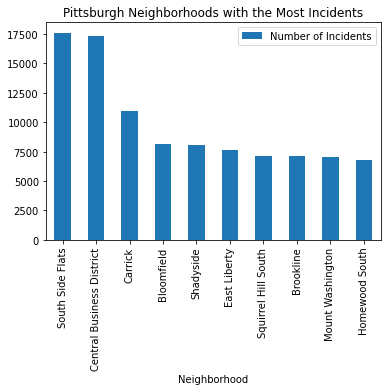

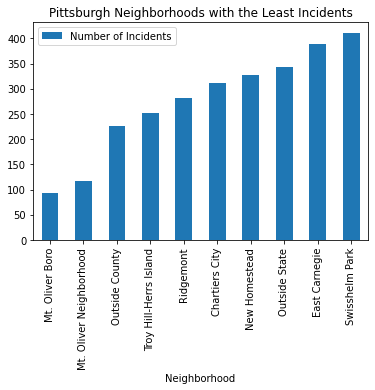

In [44]:
plt = incidents_sorted.iloc[:10].plot(kind='bar', x="Neighborhood", y="Number of Incidents", title="Pittsburgh Neighborhoods with the Most Incidents")
plt = incidents_sorted_opp.iloc[:10].plot(kind='bar', x="Neighborhood", y="Number of Incidents", title="Pittsburgh Neighborhoods with the Least Incidents")

We can see that the top two: South Side Flats and Central Business District appear to be upper level outliers, and the next 8 appear to decrease in an almost linear rate. Furthermore the bottom two: Mt. Oliver Boro and Mt. Oliver Neighborhood appear to be lower level outliers, and the next 8 increase by an almost linear rate.

Moving on, the original Police Incidents dataset included a hierarchy for the incidents, based on the severity of the incident. We can analyze this column to determine which neighborhoods had incidents with high hierarchies and low hierarchies.

In [9]:
hierarchy = pd.DataFrame(columns=["Neighborhood","Hierarchy"])
hierarchy["Hierarchy"]=police_incidents["HIERARCHY"]
hierarchy["Neighborhood"]=police_incidents["INCIDENTNEIGHBORHOOD"]

hierarchy_sorted = hierarchy.sort_values("Hierarchy", ascending=False)
hierarchy_sorted.head(5)

,Neighborhood,Hierarchy
312608,Squirrel Hill North,99
209491,Chateau,99
209480,Squirrel Hill South,99
209481,Allentown,99
209482,Chateau,99


We can see that the highest value in the hierarchy is 99, and now if we sort the dataset in ascending order we can see the lowest hierarchy value

In [9]:
hierarchy_sorted_opp = hierarchy.sort_values("Hierarchy", ascending=True)
hierarchy_sorted_opp.head(5)

,Neighborhood,Hierarchy
147646,Strip District,0
201549,Lincoln-Lemington-Belmar,0
83745,Brighton Heights,0
303257,Allegheny Center,0
300531,Windgap,0


Now lets see which neighborhoods have incidents classified as 99 and which ones have incidents classified as 0.

In [22]:
ranked_incidents=gpd.read_file('Police_Incidents.csv')
#only include incidents with a hierarchy of 99 in the dataset
ranked_incidents=ranked_incidents[ranked_incidents["HIERARCHY"] == "99"]

In [23]:

severity = pd.DataFrame(columns = ["Neighborhood" ,"Number of Incidents Classified 99"])
severity["Neighborhood"] = incidents_agg["Neighborhood"]
severity["Number of Incidents Classified 99"] = 0

for i, row in ranked_incidents.iterrows():
    neighborhood = row["INCIDENTNEIGHBORHOOD"]
 # Check to see if the neighborhood is already been acremented
        #If so, increment the number of incidents that are classified 99 in that neighborhood
    if neighborhood in severity["Neighborhood"].values:
            severity.loc[severity["Neighborhood"] == neighborhood, "Number of Incidents Classified 99"] += 1
    else:
        # If not, add a new row to the aggregated DataFrame
            agg_new_row = pd.DataFrame({ 'Neighborhood': [neighborhood], 'Number of Incidents Classified 99': [1] })
            severity = pd.concat([severity, agg_new_row])

        



In [24]:
severity_sorted= severity.sort_values("Number of Incidents Classified 99", ascending=False)
severity_sorted.head(5)

,Neighborhood,Number of Incidents Classified 99
0,Central Business District,6016
0,South Side Flats,4861
0,Carrick,3469
0,Brookline,2797
0,Mount Washington,2592


We can see the district with the most 99 level incidents is Central Business District. Lets plot the top ten nieghborhoods with 99 level incidents to see the distribution.

plt = severity_sorted.iloc[:10].plot(kind='bar', x="Neighborhood", y="Number of Incidents Classified 99", title="Pittsburgh Neighborhoods with the Most Incidents Classified 99")

Finally, lets determine which neighborhoods have the highest number of incidents that are ranked 0 on the nierarchy, by repeating the process above but replacing 99 with 0.

In [26]:
ranked_incidents=gpd.read_file('Police_Incidents.csv')
#only include incidents with a hierarchy of 99 in the dataset
ranked_incidents=ranked_incidents[ranked_incidents["HIERARCHY"] == "0"]

In [33]:
Severity = pd.DataFrame(columns = ["Neighborhood" ,"Number of Incidents Classified 0"])
Severity["Neighborhood"] = incidents_agg["Neighborhood"]
Severity["Number of Incidents Classified 0"] = 0

for i, row in ranked_incidents.iterrows():
    neighborhood = row["INCIDENTNEIGHBORHOOD"]
 # Check to see if the neighborhood is already been acremented
        #If so, increment the number of incidents that are classified 99 in that neighborhood
    if neighborhood in Severity["Neighborhood"].values:
            Severity.loc[Severity["Neighborhood"] == neighborhood, "Number of Incidents Classified 0"] += 1
    else:
        # If not, add a new row to the aggregated DataFrame
            agg_new_row = pd.DataFrame({ 'Neighborhood': [neighborhood], 'Number of Incidents Classified 0': [1] })
            Severity = pd.concat([Severity, agg_new_row])


In [34]:
Severity_sorted= Severity.sort_values("Number of Incidents Classified 0", ascending=False)
Severity_sorted.head(5)

,Neighborhood,Number of Incidents Classified 0
0,South Side Slopes,14
0,South Side Flats,13
0,Central Business District,12
0,Carrick,12
0,Strip District,9


And let's plot this data:

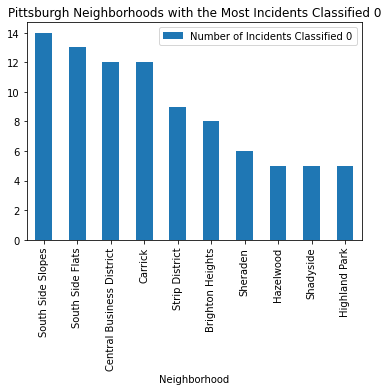

In [35]:
plt = Severity_sorted.iloc[:10].plot(kind='bar', x="Neighborhood", y="Number of Incidents Classified 0", title="Pittsburgh Neighborhoods with the Most Incidents Classified 0")

By comparing the bar graphs of the number of total incidents per neighborhood with the number of incidents classified as level 99, we can see that South Side Flats has the most number of total incidents, and one of the highest number of incidents ranked 99 in the hierarchy. You would think this means South Side Flats is one of the more dangerous places to live. However, the original dataset also used descriptions of the incident along with the hierarchy and location, and the descriptions show us that an incident that is 99 on the Hierarchy is actually least severe, and the incidents ranked 0 are most severe, which means South Side Slopes, with the highest number of level 0 incidents in Pittsburgh would probably be the most dangerous neighborhood to live. This makes sense, because the highest number of level 99 incidents in one neighborhood was 6016, while the highest number of level 0 incidents in one neighborhood was only 14, because it is a much more serious crime. And overall, the neighborhood with the smallest amount of total incidents was Mt. Oliver Boro, making it most likely the safest neighborhood to live based soley on the Police Incidents Metric.